## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## LOADING DATASET

In [3]:
df=pd.read_csv('mh.csv')
df

,Gender,Age,Area_of_living,Feel_1st.Lockdown,Health_affected,Enjoyment_of_lockdown,new_varient.(omicron),feel_Lockdown.again,feel_loneliness,miss_the_most,Effect_of_online_edu,Effect_of_financial.status,Depression_or_stress,Reason_for_stress,Overcome_stress
0,Male,21,Rural,4,Maybe,4,Yes,2,No,Friends,Maybe,Yes,No,Missing college/school life,Yes
1,Male,21,Rural,4,No,5,Yes,5,No,Friends,Yes,No,No,Not seeing friends/loved one,Yes
2,Female,18,Urban,3,Maybe,3,Yes,3,Maybe,Friends,Yes,Yes,No,Missing college/school life,Yes
3,Male,21,Urban,5,No,5,Yes,5,No,Friends,No,Yes,No,Worried about my carrier,Yes
4,Male,21,Urban,3,No,4,No,5,No,Loved one,Maybe,Maybe,No,Worried about my carrier,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Male,21,Rural,3,No,4,Yes,3,No,Friends,Maybe,Maybe,No,Worried about my carrier,Yes
124,Male,21,Rural,3,No,2,Yes,3,Yes,Loved one,Yes,Yes,Yes,Worried about my carrier,Yes
125,Male,21,Urban,5,Yes,3,Yes,5,No,Other relations,No,Yes,No,financial problem,Yes
126,Female,20,Rural,1,No,1,Yes,1,Yes,Friends,Yes,No,Yes,Worried about my carrier,Yes


## DATA PRE-PROCESSING

In [4]:
df.isna().sum()

Gender                        0
Age                           0
Area_of_living                0
Feel_1st.Lockdown             0
Health_affected               0
Enjoyment_of_lockdown         0
new_varient.(omicron)         0
feel_Lockdown.again           0
feel_loneliness               0
miss_the_most                 0
Effect_of_online_edu          0
Effect_of_financial.status    0
Depression_or_stress          0
Reason_for_stress             0
Overcome_stress               0
dtype: int64

In [5]:
df.columns

Index(['Gender', 'Age', 'Area_of_living', 'Feel_1st.Lockdown',
       'Health_affected', 'Enjoyment_of_lockdown', 'new_varient.(omicron)',
       'feel_Lockdown.again ', 'feel_loneliness', 'miss_the_most',
       'Effect_of_online_edu', 'Effect_of_financial.status',
       'Depression_or_stress', 'Reason_for_stress', 'Overcome_stress'],
      dtype='object')

NOTE : This dataset has no null values and duplicate values now. So further processing will not be done such as replacing or deleting a null rows. So data is ready for traning, before training we visualise the data.

## EXPLORATORY DATA ANALYSIS

### Count Plots
Show the counts of observations in each categorical bin using bars.

<AxesSubplot:title={'center':'REASON FOR STRESS'}, xlabel='Reason_for_stress', ylabel='count'>

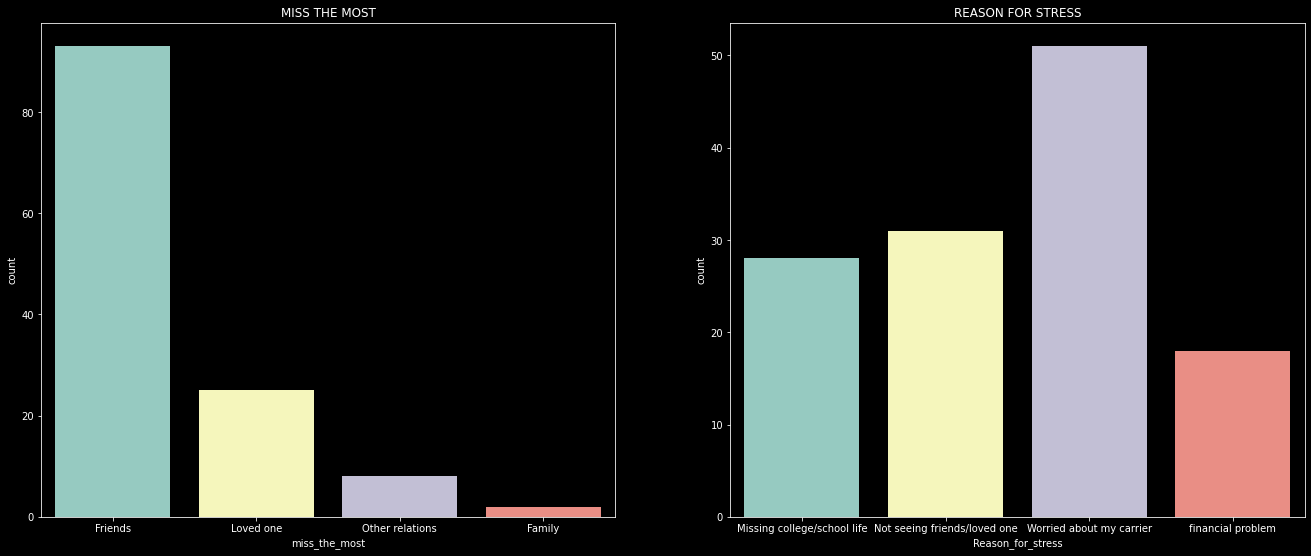

In [6]:
fig = plt.figure(figsize=(35,20))

#  subplot #1
plt.subplot(231)
plt.title('MISS THE MOST')
sb.countplot(data = df, x='miss_the_most')

#  subplot #2
plt.subplot(2,3,2)
plt.title('REASON FOR STRESS')
sb.countplot(data = df, x='Reason_for_stress')

### Lable Encoding

In [7]:
#To give numerical values for categorical variables

columns = ['Gender','Area_of_living','Health_affected','new_varient.(omicron)','feel_loneliness',
           'miss_the_most','Effect_of_online_edu','Effect_of_financial.status','Depression_or_stress',
           'Reason_for_stress','Overcome_stress']
encoder=LabelEncoder()
for i in columns:
    df[i] = encoder.fit_transform(df[i])

### Heat Map

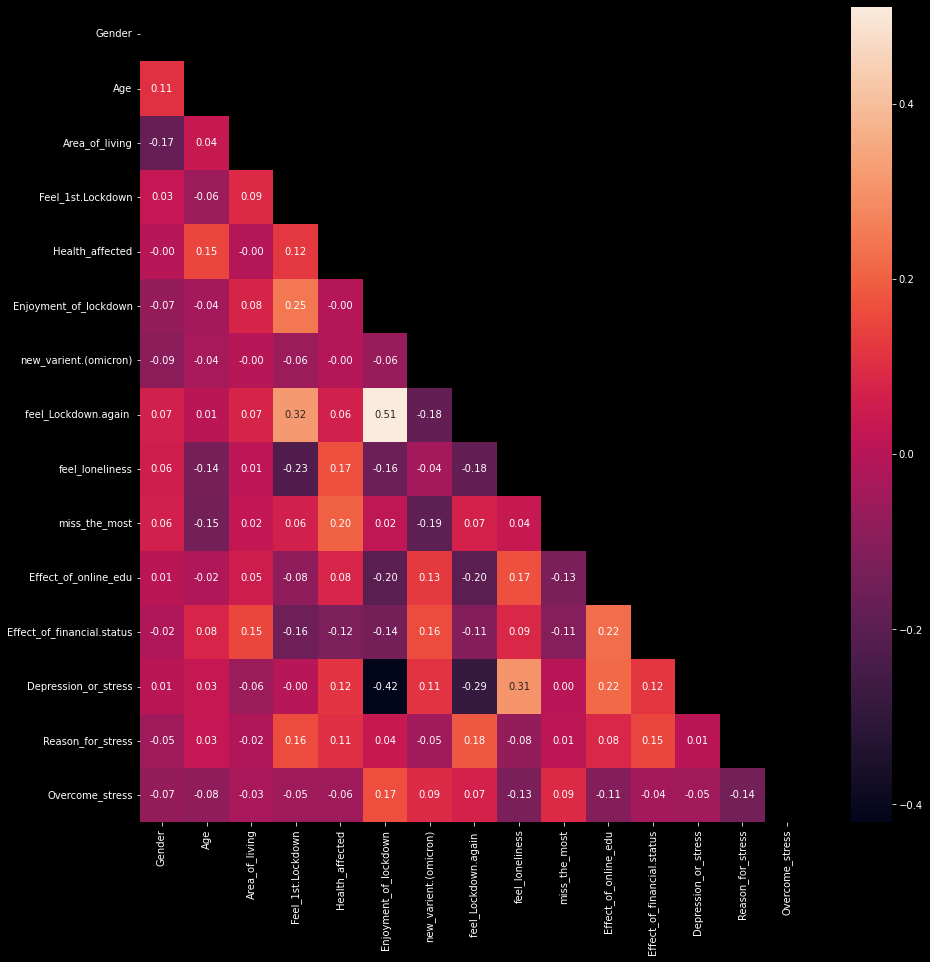

In [8]:
#to see the relation of variaables using correlation
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15, 15))
sb.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

### Pairs Plot

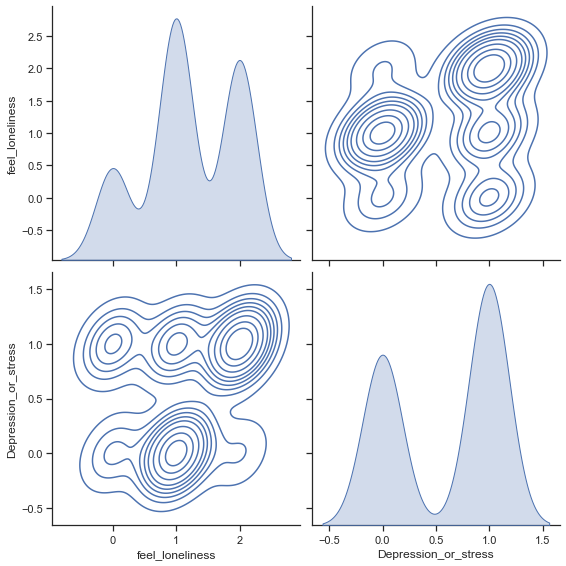

In [9]:
sb.set(style='ticks')
sb.pairplot(df,vars=['feel_loneliness','Depression_or_stress']
            ,height=4,kind="kde",palette='husl')

## DATA MODELING

### Future Selection

In [10]:
df.drop(columns=['Age','Gender','Area_of_living','Feel_1st.Lockdown',
                   'miss_the_most','Reason_for_stress','Overcome_stress','feel_Lockdown.again '],axis=1,inplace=True)

### Data Normalization

In [11]:
df_norm = (df-df.min())/ (df.max() - df.min())
df_norm.head()

,Health_affected,Enjoyment_of_lockdown,new_varient.(omicron),feel_loneliness,Effect_of_online_edu,Effect_of_financial.status,Depression_or_stress
0,0.0,0.75,1.0,0.5,0.0,1.0,0.0
1,0.5,1.00,1.0,0.5,1.0,0.5,0.0
2,0.0,0.50,1.0,0.0,1.0,1.0,0.0
3,0.5,1.00,1.0,0.5,0.5,1.0,0.0
4,0.5,0.75,0.0,0.5,0.0,0.0,0.0


### Split Train Test Dataset

In [12]:
x= df.drop(columns=['Depression_or_stress'],axis=1)
y= df['Depression_or_stress']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [14]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [16]:
#RandomForestClassifiers
#SVM
#KNN
#NaiveBayes
#AdaBoost
#XGBoost

In [17]:
moelel_params= {
    'svm': {
        'model': SVC(),
        'params':{
            'C': [0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf', 'linear']
            }
},
'Random Forest':{
    'model': RandomForestClassifier(),
    'params':{
        'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        'max_features' : ['auto','sqrt'],
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_samples_split' : randint(2,10),
        'min_samples_leaf' : randint(1,4),
        'bootstrap' : [True, False]
    }
},
'Naive bayes' : {
    'model' : GaussianNB(),
    'params' : {
        'var_smoothing': np.logspace(0,-9, num=100)
    }
},
'XGBoost' : {
    'model' : XGBClassifier(),
    'params' : {
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)],
        'max_depth': [int(x) for x in np.linspace(start = 1, stop = 15, num = 1)],
        'learning_rate': [0.025, 0.05, 0.1, 0.15, 0.20],
        'min_child_weight': [int(x) for x in np.linspace(start = 1, stop = 10, num = 1)],
        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
        'colsample_bytree': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9,],
        'reg_alpha': [0, 0.5, 1, 5],
        'reg_lambda' : [0, 0.5, 1, 5]
    }
}
}


In [18]:
score=[]

#cm=Confusion Matrix
#acc=Accuracy
#auc=Area Under Curve
acc_list = []
auc_list = []
cm_list = []

for model_name, mp in moelel_params.items():
    
    #creating the model
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter = 100, cv = 5, verbose=1, random_state=None,
     n_jobs = -1, return_train_score=False)
    
    #fitting the train dataset into the model
    clf.fit(x_train, y_train)
    
    #predict the test data set using trained model
    y_pred = clf.predict(x_test)
    
    #finding the accuracy, AUC and Confussion Matrix of the model
    acc_list.append(accuracy_score(y_test,y_pred)*100)
    fpr, tpr, _threshold = roc_curve(y_test, y_pred)
    auc_list.append(round(auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    
    
    score.append ({
        'Model': model_name,
        'Best Score': clf.best_score_,
        'Best Params': clf.best_params_,
    }
)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


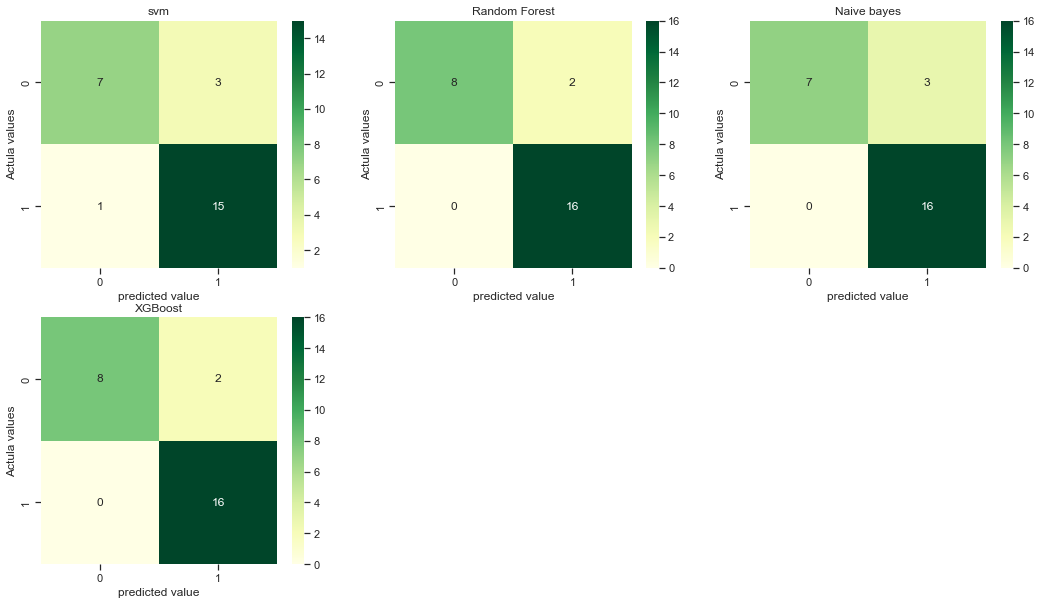

In [19]:
## plot confusion matrix 
fig= plt.figure(figsize=(18,10))

a= pd.DataFrame(score,columns=['Model'])
a= a['Model']

for i in range(len(cm_list)):
    cm = cm_list[i]
    model = a[i]
    sub = fig.add_subplot(2, 3 ,i+1).set_title(model)
    cm_plot = sb.heatmap(cm, annot=True,cmap='YlGn')
    cm_plot.set_xlabel('predicted value')
    cm_plot.set_ylabel('Actula values')

### Model Comparison

In [20]:
pd.set_option("display.max_colwidth", -1)
scores= pd.DataFrame(score,columns=['Model','Best Score','Best Params'])
acc_auc=pd.DataFrame({'Accuracy':acc_list, 'AUC':auc_list})

#concat both the dataframe
result = pd.concat([scores, acc_auc], axis=1, join='inner')

# sort Best Accuracy in an decending order
result.sort_values(by=['Best Score'], inplace=True, ascending=False)

result

,Model,Best Score,Best Params,Accuracy,AUC
3,XGBoost,0.813810,"{'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 797, 'min_child_weight': 1, 'max_depth': 1, 'learning_rate': 0.025, 'gamma': 0.5, 'colsample_bytree': 0.1}",92.307692,0.90
2,Naive bayes,0.785238,{'var_smoothing': 0.008111308307896872},88.461538,0.85
1,Random Forest,0.774286,"{'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}",92.307692,0.90
0,svm,0.715238,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}",84.615385,0.82


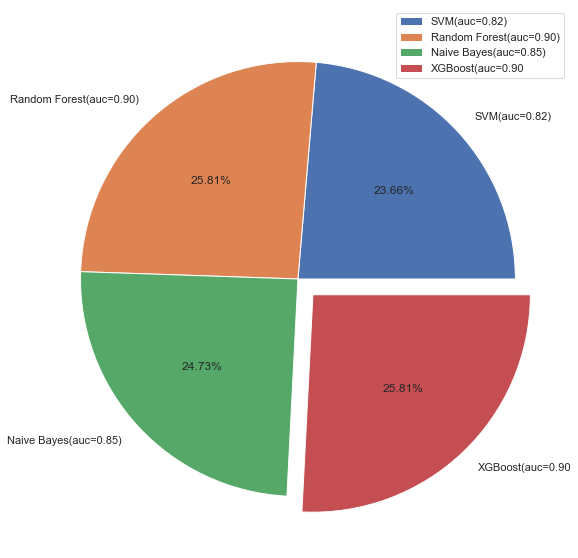

In [23]:
plt.figure(figsize=(10,10))
model_and_auc = ['SVM(auc=0.82)','Random Forest(auc=0.90)',
                'Naive Bayes(auc=0.85)','XGBoost(auc=0.90)']
plt.pie(acc_list,labels=model_and_auc,explode = [0,0,0,0.1],autopct="%.2f%%")
plt.legend(loc='upper right')
plt.show()